# <span style="color:blue">Analysis Part

In [6]:
# load package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats.stats import pearsonr
import scipy.stats as ss

from sklearn.linear_model import LogisticRegressionCV
from sklearn.cross_validation import train_test_split

## <span style="color:orange">Load the data, and print out a subset of it (any subset is fine)

In [7]:
data = pd.read_table('data/IrishElectricity.txt',sep='\s+')

In [8]:
# check the shape of our dataset
data.shape

(151, 127)

In [5]:
# the subset of data I extracted -- having the glance of dataset
data.sample(10)

,Age,Resident,Attitude.Reduce.Bill,Attitude.Environment,Bedroom,Education,V1,V2,V3,V4,...,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121
3070,3,2,1,1,2,4,12.167,12.243,13.994,13.689,...,12.592,11.879,11.561,11.507,11.314,12.103,11.657,12.652,11.122,11.831
84,3,1,1,4,2,3,28.987,27.842,21.867,25.234,...,15.965,16.916,15.535,16.354,16.377,19.216,16.635,16.000,16.225,18.851
1270,4,3,1,1,2,4,16.472,24.312,18.387,30.604,...,17.795,18.488,17.229,17.094,17.173,21.521,18.117,21.181,16.682,18.060
1872,5,2,2,2,3,4,21.228,17.250,15.631,17.855,...,17.602,19.909,18.245,23.009,20.100,16.350,17.588,21.909,19.963,14.017
3609,4,4,1,1,4,5,17.776,31.347,36.142,22.920,...,28.540,28.754,26.581,26.156,29.823,27.253,30.117,25.773,29.038,25.701
56,2,2,2,2,4,5,18.790,15.244,16.311,15.680,...,28.654,27.839,24.630,24.974,24.754,28.091,26.647,26.396,29.365,25.554
4033,3,5,3,1,5,3,57.682,52.852,49.389,50.367,...,38.846,43.409,39.067,39.208,37.881,39.280,37.916,32.410,39.025,36.380
850,6,2,1,1,4,3,34.292,37.676,29.780,43.702,...,46.551,39.382,43.046,41.752,40.711,42.218,40.613,48.322,38.402,39.898
1591,5,2,1,1,2,2,15.107,18.345,19.033,16.787,...,13.079,12.526,14.014,11.226,11.992,13.883,12.506,13.078,11.258,13.156
3489,2,2,1,1,3,3,15.756,16.884,9.006,19.851,...,22.009,16.436,14.049,15.517,14.230,14.159,14.932,18.741,17.280,16.377


In [9]:
# check the uniqueness of records
len(data.index.unique()) == len(data)

True

In [7]:
# get the range of ourdatset
data.describe()

,Age,Resident,Attitude.Reduce.Bill,Attitude.Environment,Bedroom,Education,V1,V2,V3,V4,...,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,...,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,4.072848,2.569536,1.198675,1.317881,3.629139,3.966887,27.648126,29.339815,28.459132,27.666252,...,24.593066,24.249490,24.718695,24.531841,23.885748,24.651013,23.972834,24.094974,23.205212,24.327642
std,1.233420,0.976456,0.577580,0.646744,0.829585,1.073420,13.347740,13.129068,13.784653,12.963579,...,11.140777,10.957568,10.818690,11.271830,10.650570,10.693935,10.582151,10.796104,10.979554,10.881448
min,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,6.927000,5.442000,1.942000,7.219000,...,2.433000,2.495000,2.480000,2.413000,2.510000,2.484000,2.463000,2.420000,2.550000,5.600000
25%,3.000000,2.000000,1.000000,1.000000,3.000000,3.000000,17.238000,18.797500,18.282000,18.671500,...,16.210000,16.212000,17.016500,16.400000,16.741500,16.929500,16.525500,16.541500,15.019000,16.350500
50%,4.000000,2.000000,1.000000,1.000000,4.000000,4.000000,25.460000,27.299000,27.032000,24.788000,...,22.783000,21.975000,23.852000,22.922000,22.490000,23.084000,22.385000,22.993000,21.358000,22.206000
75%,5.000000,3.000000,1.000000,1.000000,4.000000,5.000000,33.835500,37.139500,35.892000,33.717500,...,32.366500,31.401000,32.653500,32.410000,31.113500,32.464000,31.711000,30.163000,30.050500,32.686000
max,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,80.166000,62.899000,72.881000,72.262000,...,58.848000,60.099000,55.532000,59.387000,65.143000,58.023000,53.083000,53.092000,59.013000,57.499000


In [11]:
data.isnull().sum()

Age                     0
Resident                0
Attitude.Reduce.Bill    0
Attitude.Environment    0
Bedroom                 0
Education               0
V1                      0
V2                      0
V3                      0
V4                      0
V5                      0
V6                      0
V7                      0
V8                      0
V9                      0
V10                     0
V11                     0
V12                     0
V13                     0
V14                     0
V15                     0
V16                     0
V17                     0
V18                     0
V19                     0
V20                     0
V21                     0
V22                     0
V23                     0
V24                     0
                       ..
V92                     0
V93                     0
V94                     0
V95                     0
V96                     0
V97                     0
V98                     0
V99         

In [22]:
# check the missing value
sum(data.isnull().sum())

0

In [ ]:
# the result of checking dataset
# 1. no missing value
# 2. the first 6 columns are catogorical data
# 3. the mean of electricity usage is around 20~30 (need further analysis, like time series analysis)

## <span style="color:orange">Print out All households with more than 3 residents

In [23]:
# count how many households with more than 3 residents
len(data[data.Resident > 3])

30

In [10]:
data[data.Resident > 3]

,Age,Resident,Attitude.Reduce.Bill,Attitude.Environment,Bedroom,Education,V1,V2,V3,V4,...,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121
316,5,4,1,1,5,5,42.247,29.237,29.869,27.568,...,40.218,41.521,36.637,42.762,35.997,36.697,35.056,40.287,46.294,40.022
625,4,4,1,1,4,5,47.409,55.340,37.764,34.195,...,48.493,52.200,42.924,46.428,40.922,45.639,49.454,49.847,49.825,50.297
747,4,5,1,1,4,3,47.333,44.438,47.723,38.556,...,40.384,40.321,34.071,33.844,31.124,30.242,36.674,33.161,36.323,36.384
790,4,4,1,1,4,5,33.654,24.308,21.396,24.307,...,33.722,36.006,34.361,35.145,34.305,33.077,36.809,35.380,37.810,33.040
815,4,4,1,1,5,5,54.905,55.105,63.840,52.639,...,50.407,60.099,55.532,56.376,48.422,42.349,48.625,47.584,50.542,48.772
818,5,4,1,1,4,5,24.699,18.793,16.533,18.946,...,26.402,20.049,23.852,22.922,20.469,21.042,20.771,21.310,20.482,21.672
904,4,4,1,1,4,4,25.882,31.015,26.466,26.087,...,37.537,32.195,27.910,27.301,30.463,28.168,33.108,31.304,37.544,32.620
958,5,4,1,2,4,4,21.371,18.600,16.958,23.641,...,21.673,20.705,20.309,24.193,20.490,23.011,19.252,19.977,21.358,23.543
1232,5,4,1,1,4,3,23.444,29.004,26.786,25.173,...,21.782,21.048,21.329,20.947,22.335,24.729,23.385,21.795,20.300,21.568
1248,4,4,1,2,4,5,51.965,55.688,53.320,60.079,...,40.788,42.462,46.426,42.724,44.931,39.203,40.014,38.528,41.187,40.213


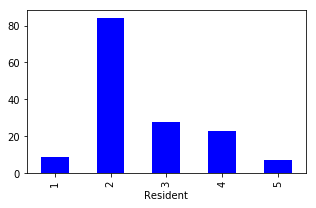

In [11]:
# get the distribution of resident number 
fig, ax = plt.subplots(figsize=(5, 3))
data.groupby('Resident').size().plot(kind="bar",color='blue')

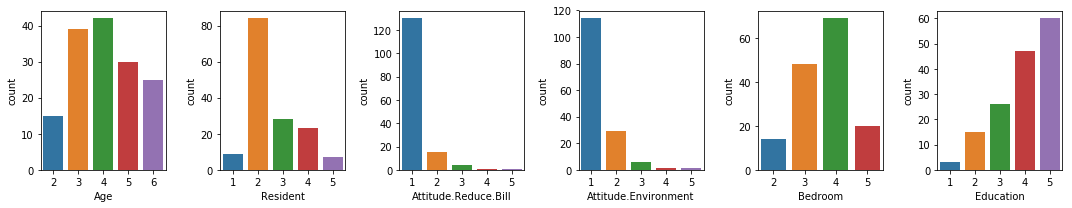

In [18]:
# other variable distribution
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(15, 3))
for i in range(6):
    sns.countplot(x=data.iloc[:,i], data=data, ax=ax[i])
fig.tight_layout()
plt.show()

## <span style="color:orange">Lets narrow down even more, lets print all households with more than 3 residents and a education level greater than 4

In [19]:
# count how many households with more than 3 residents and a education level greater than 4
len(data[(data.Resident > 3) & (data.Education > 4)])

14

In [20]:
data[(data.Resident > 3) & (data.Education > 4)]

,Age,Resident,Attitude.Reduce.Bill,Attitude.Environment,Bedroom,Education,V1,V2,V3,V4,...,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121
316,5,4,1,1,5,5,42.247,29.237,29.869,27.568,...,40.218,41.521,36.637,42.762,35.997,36.697,35.056,40.287,46.294,40.022
625,4,4,1,1,4,5,47.409,55.340,37.764,34.195,...,48.493,52.200,42.924,46.428,40.922,45.639,49.454,49.847,49.825,50.297
790,4,4,1,1,4,5,33.654,24.308,21.396,24.307,...,33.722,36.006,34.361,35.145,34.305,33.077,36.809,35.380,37.810,33.040
815,4,4,1,1,5,5,54.905,55.105,63.840,52.639,...,50.407,60.099,55.532,56.376,48.422,42.349,48.625,47.584,50.542,48.772
818,5,4,1,1,4,5,24.699,18.793,16.533,18.946,...,26.402,20.049,23.852,22.922,20.469,21.042,20.771,21.310,20.482,21.672
1248,4,4,1,2,4,5,51.965,55.688,53.320,60.079,...,40.788,42.462,46.426,42.724,44.931,39.203,40.014,38.528,41.187,40.213
1311,5,4,1,1,5,5,80.166,61.743,33.554,53.273,...,48.056,45.115,49.627,42.466,41.750,42.090,44.129,49.768,47.985,43.974
1875,6,4,1,1,4,5,22.262,24.661,27.220,18.288,...,16.223,16.382,18.198,18.564,20.887,22.496,19.392,20.809,18.427,21.058
2699,3,4,1,1,3,5,26.864,26.567,36.958,28.596,...,33.023,34.279,38.267,34.362,38.398,32.582,36.542,32.795,38.198,30.417
3304,4,4,1,3,4,5,38.335,46.342,44.674,51.105,...,27.687,28.509,30.517,35.991,27.381,28.556,24.365,26.577,21.611,36.816


In [21]:
data.groupby(['Resident','Education']).size().unstack()

Education,1,2,3,4,5
Resident,,,,,
1,NaN,NaN,2.0,3.0,4.0
2,2.0,11.0,9.0,27.0,35.0
3,NaN,2.0,10.0,9.0,7.0
4,1.0,1.0,3.0,6.0,12.0
5,NaN,1.0,2.0,2.0,2.0


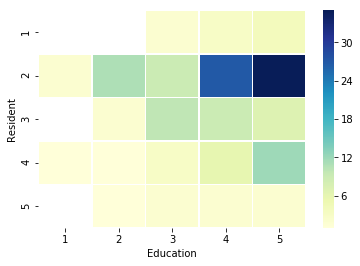

In [23]:
# get the distribution of resident number vs education
# we can see most of our clients are concentrated in 2 residents and 4/5 education level
htdata = data.groupby(['Resident','Education']).size().unstack()
ax = sns.heatmap(htdata, linewidth=0.5,cmap="YlGnBu")
plt.show()

In [27]:
#data.groupby(fea[comb[i][0]],fea[comb[i][1]]).size().unstack()
data.groupby(['Resident', 'Education']).size().unstack()

Education,1,2,3,4,5
Resident,,,,,
1,NaN,NaN,2.0,3.0,4.0
2,2.0,11.0,9.0,27.0,35.0
3,NaN,2.0,10.0,9.0,7.0
4,1.0,1.0,3.0,6.0,12.0
5,NaN,1.0,2.0,2.0,2.0


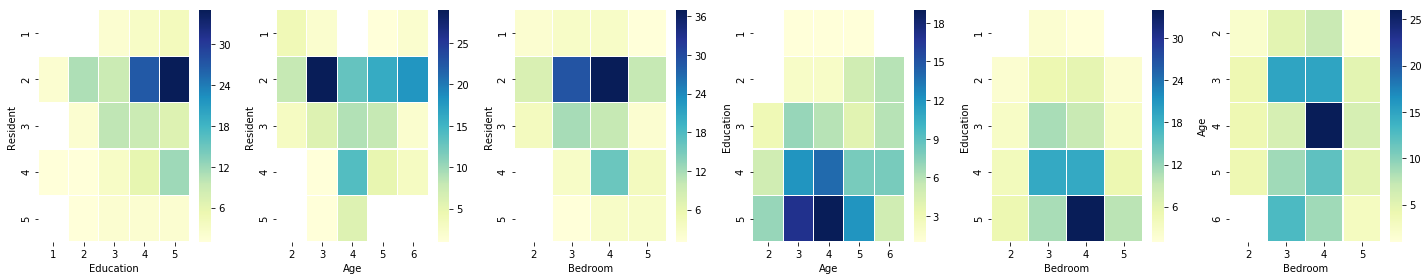

In [42]:
# other variable distribution
from itertools import combinations 
comb = list(combinations([0, 1, 2, 3], 2))
fea = ['Resident','Education','Age','Bedroom']

fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(20, 4))
for i in range(6):
    temp = data.groupby([fea[comb[i][0]],fea[comb[i][1]]]).size().unstack()
    sns.heatmap(temp, linewidth=0.1,cmap="YlGnBu",ax=ax[i])
fig.tight_layout()
plt.show()

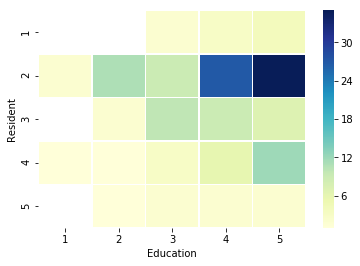

In [20]:
# other variable distribution
ddd = data.groupby(['Resident','Education']).size().unstack()
sns.heatmap(ddd, linewidth=0.5,cmap="YlGnBu")

## <span style="color:orange">Interesting stuff right? Ok, lets do some analysis. Find out if there is some linear correlation between the number of residents and the electricty usage. For refrence the columns V1-V121 are the electricity usage values through time. Please parse this as you wish and tell us how you chose to parse it.

In [44]:
# parse method: take the mean of 4 months electricity usage
# reason: 
# 1. the method to convert high dimention data (121 points to 1 point)
# 2. remove the seasonal/time usage change -- get more overall view

data['ele_mean'] = data.iloc[:,6:].mean(axis=1)

In [25]:
# method 1: 
# check the anova
# the hypothesis is: the mean of different resident number is same

grps = pd.unique(data.Resident)
d_data = {grp:data['ele_mean'][data.Resident==grp] for grp in grps}

In [26]:
# the p value is less than 0.05, we reject the null hypothesis
# conclude that different groups are different

f, p = stats.f_oneway(d_data[1],d_data[2],d_data[3],d_data[4],d_data[5])
p

0.0006866039335225267

In [ ]:
# method 2: 
# check the correlation coefficient
# positive relationship
# the result show more residents, more usage (make sense)



In [27]:
pearsonr(data['ele_mean'], data.Resident)[0]

0.3016878185383216

In [95]:
# method 3: 
# 3.1 build linear model to predict the resident number
# I choose logistic regression

# put all 4 months (121d) usage data as X
X = data.iloc[:,6:-1]
y = data.Resident

# split train and test
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3)

In [31]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121
19,40.063,38.140,41.999,35.806,48.830,33.674,38.446,27.903,33.426,26.561,...,41.272,43.287,37.298,40.416,36.418,35.781,36.229,35.593,34.700,38.554
56,18.790,15.244,16.311,15.680,23.439,20.218,17.091,20.833,22.458,14.335,...,28.654,27.839,24.630,24.974,24.754,28.091,26.647,26.396,29.365,25.554
84,28.987,27.842,21.867,25.234,24.102,29.673,30.710,24.086,27.920,31.693,...,15.965,16.916,15.535,16.354,16.377,19.216,16.635,16.000,16.225,18.851
91,27.958,50.075,31.616,54.245,61.454,42.392,37.487,40.877,34.740,52.851,...,46.709,40.596,42.184,42.953,45.545,45.579,50.929,46.229,43.912,47.551
118,15.851,23.921,25.420,26.047,23.021,31.340,31.492,16.077,20.629,21.442,...,11.871,12.218,16.976,15.903,16.031,20.562,17.735,11.671,11.555,12.951


In [96]:
# Build logistic regression model

lrcv = LogisticRegressionCV(fit_intercept=True, 
                          Cs=np.logspace(-5, 1, 100),
                          multi_class='multinomial', 
                          penalty='l2', 
                          solver='lbfgs')

lrcv.fit(Xtrain,ytrain)

LogisticRegressionCV(Cs=array([1.00000e-05, 1.14976e-05, ..., 8.69749e+00, 1.00000e+01]),
           class_weight=None, cv=None, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=100, multi_class='multinomial',
           n_jobs=1, penalty='l2', random_state=None, refit=True,
           scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [97]:
# the result is only 0.54 (make sense: need feature engineering to enhance the prediction accuracy)

ytest_predict = lrcv.predict(Xtest)
sum(ytest_predict==ytest)/len(ytest)

0.5434782608695652

In [101]:
# 3.2 only use the usage mean as input

new_X = data['ele_mean'].values.reshape(1, -1).transpose()
lrcv.fit(new_X,y)

LogisticRegressionCV(Cs=array([1.00000e-05, 1.14976e-05, ..., 8.69749e+00, 1.00000e+01]),
           class_weight=None, cv=None, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=100, multi_class='multinomial',
           n_jobs=1, penalty='l2', random_state=None, refit=True,
           scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [102]:
# the accuracy improved from 0.54 to 0.56!
# turned out that usage mean and residents num are correlated

yy = lrcv.predict(new_X)
sum(yy==y)/len(y)

0.5629139072847682

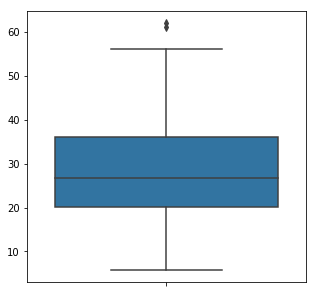

In [113]:
# 3.3 linear model is sensitive to the outlier
# check the outlier
fig, ax = plt.subplots(figsize=(5,5))
newdf = pd.DataFrame(new_X)
sns.boxplot(newdf,orient='v')

In [120]:
# use z score to check the outlier
z = np.abs(stats.zscore(new_X))
data[z>3]

,Age,Resident,Attitude.Reduce.Bill,Attitude.Environment,Bedroom,Education,V1,V2,V3,V4,...,V113,V114,V115,V116,V117,V118,V119,V120,V121,ele_mean
1311,5,4,1,1,5,5,80.166,61.743,33.554,53.273,...,45.115,49.627,42.466,41.75,42.09,44.129,49.768,47.985,43.974,62.045512


In [150]:
# use the definition of box plot find the outlier
Q1 = float(newdf.quantile(0.25))
Q3 = float(newdf.quantile(0.75))
IQR = Q3 - Q1
data[(new_X < (Q1 - 1.5 * IQR)) | (new_X > Q3 + 1.5 * IQR)]

,Age,Resident,Attitude.Reduce.Bill,Attitude.Environment,Bedroom,Education,V1,V2,V3,V4,...,V113,V114,V115,V116,V117,V118,V119,V120,V121,ele_mean
1311,5,4,1,1,5,5,80.166,61.743,33.554,53.273,...,45.115,49.627,42.466,41.750,42.090,44.129,49.768,47.985,43.974,62.045512
3318,6,2,1,1,5,3,69.934,56.376,70.845,68.872,...,50.567,53.200,59.387,55.766,58.023,51.199,53.092,51.131,54.667,61.149570


In [153]:
# remove the outlier to get the new dataset
newdata = data[~((new_X < (Q1 - 1.5 * IQR)) | (new_X > Q3 + 1.5 * IQR))]

In [178]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()   
norm_X = scaler.fit_transform(newdata['ele_mean'].values.reshape(-1, 1))
xx = PolynomialFeatures(10).fit_transform(norm_X)[:,1:]
yy = newdata.Resident

lrcv.fit(xx,yy)

yy_pred = lrcv.predict(xx)
sum(yy_pred==yy)/len(yy)

0.5637583892617449

In [182]:
# feature selection

#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2
#X_new = SelectKBest(chi2, k=2).fit_transform(xx, yy)
#X_new.shape

from sklearn.feature_selection import SelectKBest,f_classif

selector=SelectKBest(score_func=f_classif,k=3)
selector.fit(xx, yy)
xx = selector.transform(xx)

lrcv.fit(xx,yy)

yy_pred = lrcv.predict(xx)
sum(yy_pred==yy)/len(yy)

0.5637583892617449

In [202]:
# from the plot we can see that resident number with 1,2,3 are overlapping
# convert to those to resident number for prediction

ndf = newdata
ndf['newres'] = ndf.Resident
ndf.loc[((ndf.Resident == 1) | (ndf.Resident == 2) | (ndf.Resident == 3)), 'newres'] = 1

xxx = ndf['ele_mean'].values.reshape(-1, 1)
yyy = ndf['newres']

lrcv.fit(xxx,yyy)

yyy_pred = lrcv.predict(xxx)
sum(yyy_pred==yyy)/len(yyy)

/Users/Janice/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/Janice/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0.8053691275167785

## <span style="color:orange">Show us a plot of the residents VS electrity with any other lines or points you wish.

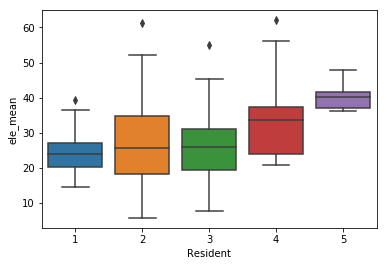

In [35]:
# pic1
# more resident number, electricity usage
sns.boxplot(x=y,y=data['ele_mean'])

In [36]:
# pic2
# group data by resident number
grp = data.groupby('Resident').mean().iloc[:,5:-1]
grp.columns = range(1,122)

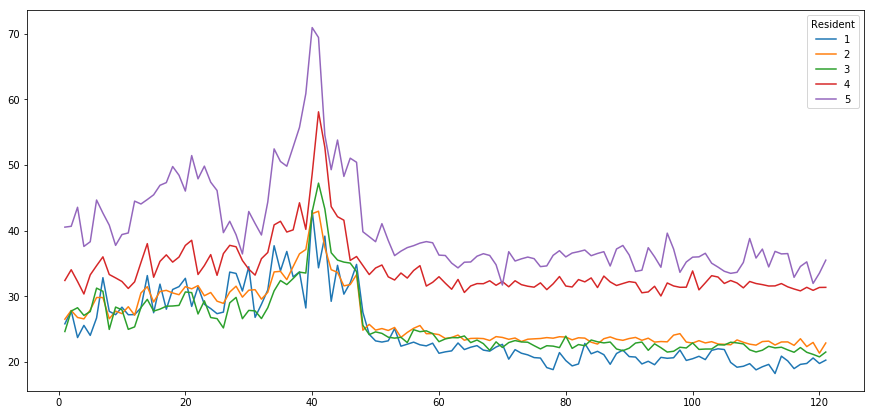

In [37]:
fig, ax = plt.subplots(figsize=(15,7))
grp.transpose().plot(ax=ax)

## <span style="color:orange">Please also create a comparison of House ID: 803 VS House ID: 3613

In [53]:
subd = data.query("index == 803 or index == 3613")
subd

,Age,Resident,Attitude.Reduce.Bill,Attitude.Environment,Bedroom,Education,V1,V2,V3,V4,...,V113,V114,V115,V116,V117,V118,V119,V120,V121,ele_mean
803,2,1,1,1,3,3,29.706,37.788,19.034,29.956,...,17.542,17.451,18.442,17.866,18.843,18.181,19.246,19.174,19.865,23.938512
3613,4,5,1,1,5,5,35.829,35.888,36.109,36.485,...,39.036,39.241,35.457,32.477,35.482,29.969,26.671,29.400,35.848,37.337521


In [39]:
# clearly, with more resident and more bedroom, 3613 has higher electricity usage
subd.iloc[:,6:-1].mean(axis=1)

803     23.938512
3613    37.337521
dtype: float64

In [40]:
# check the p value of t-test, less than 0.05
# turns out the usages are different for 803 and 3613
ss.ttest_ind(subd.iloc[0,6:-1],subd.iloc[1,6:-1])

Ttest_indResult(statistic=-13.879160777772476, pvalue=1.499995157069306e-32)

## <span style="color:orange">Plot the energy usage over time (V1-V121) for these two houses

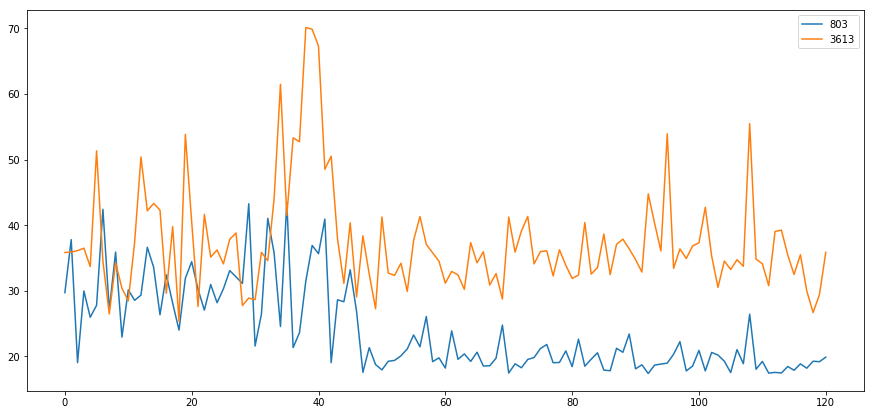

In [84]:
subd_usage = subd.iloc[:,6:-1]
subd_usage.columns = [i for i in range(121)]
fig, ax = plt.subplots(figsize=(15,7))
subd_usage.transpose().plot(ax=ax)

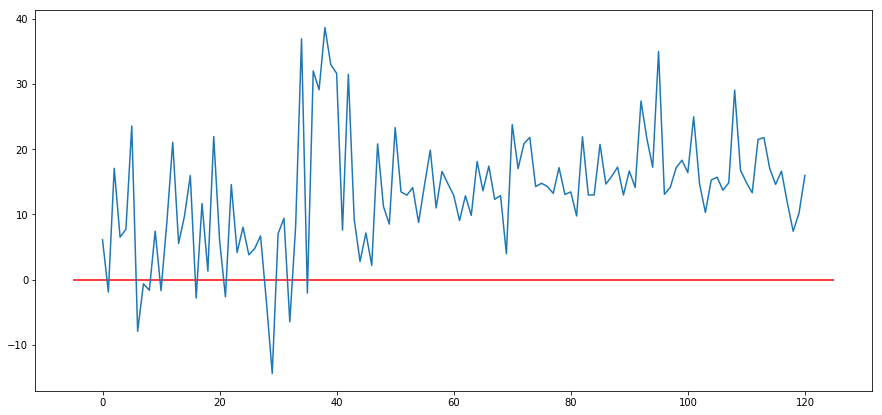

In [87]:
# take the difference of 3613 and 803
fig, ax = plt.subplots(figsize=(15,7))
diff = subd_usage.iloc[1,:] - subd_usage.iloc[0,:]
diff.plot()
ax.hlines(0,-5,125,colors='red')

In [86]:
# there 91% time that 3613 usage is larger than 803
sum(diff>0)/len(diff)

0.9090909090909091

## <span style="color:orange">Lets fully analyze this data. Please print the pairwise correlation of columns coefficients for all the covariates versus the average energy usage for the household over the recording period. (A plot might be helpful too)

In [45]:
d = data[['Age','Resident','Attitude.Reduce.Bill','Attitude.Environment', 'Bedroom', 'Education','ele_mean']]

In [79]:
d.head()

,Age,Resident,Attitude.Reduce.Bill,Attitude.Environment,Bedroom,Education,ele_mean
19,3,2,1,1,3,5,37.905554
56,2,2,2,2,4,5,25.624521
84,3,1,1,4,2,3,21.720826
91,3,2,1,1,3,4,44.056554
118,2,3,1,1,4,5,18.822661


In [97]:
mydict = {}
for i in range(6):
    mydict[d.columns[i]] = pearsonr(d.iloc[:,i],d['ele_mean'])[0]
    print('the correlation coefficient value of {} and electricity usage is {}'
          .format(d.columns[i], pearsonr(d.iloc[:,i],d['ele_mean'])[0]))

the correlation coefficient value of Age and electricity usage is -0.0997294008202368
the correlation coefficient value of Resident and electricity usage is 0.3016878185383216
the correlation coefficient value of Attitude.Reduce.Bill and electricity usage is -0.15290760431598305
the correlation coefficient value of Attitude.Environment and electricity usage is -0.09509692863678926
the correlation coefficient value of Bedroom and electricity usage is 0.5450925577360287
the correlation coefficient value of Education and electricity usage is 0.1766045558035458


In [110]:
cormatrix = pd.DataFrame.from_dict(mydict, orient='index').reset_index()
cormatrix.columns = ['var','correlation value']
cormatrix

,var,correlation value
0,Age,-0.099729
1,Resident,0.301688
2,Attitude.Reduce.Bill,-0.152908
3,Attitude.Environment,-0.095097
4,Bedroom,0.545093
5,Education,0.176605


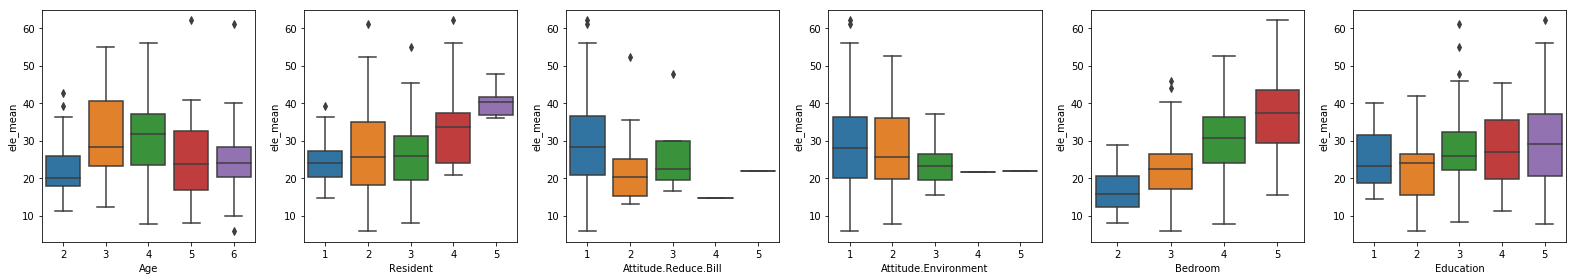

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(22, 4))
for i in range(6):
    sns.boxplot(x=d.iloc[:,i],y=d['ele_mean'],ax=ax[i])
fig.tight_layout()
plt.show()

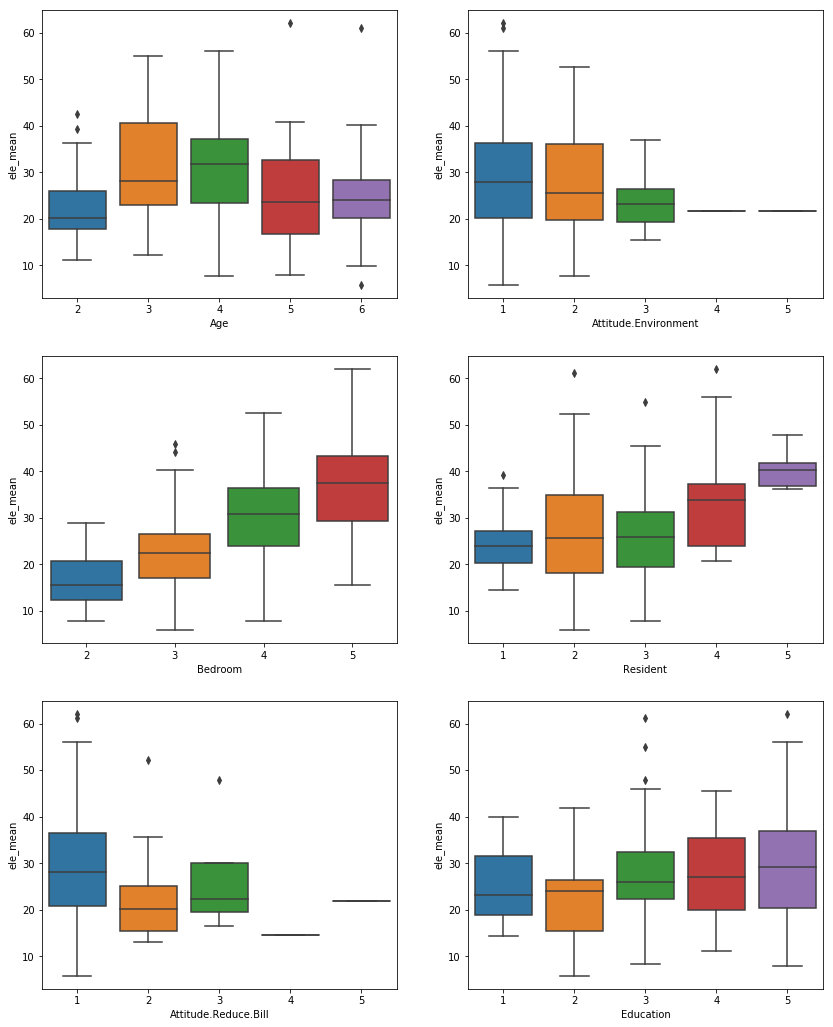

In [85]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))
for i in range(6):
    sns.boxplot(x=d.iloc[:,i],y=d['ele_mean'],ax=ax[i%3,i%2])

In [246]:
# check why only there is only one point for 4 and 5 in Attitude.Reduce.Bill
d.groupby('Attitude.Reduce.Bill')['ele_mean'].describe()

,count,mean,std,min,25%,50%,75%,max
Attitude.Reduce.Bill,,,,,,,,
1,130.0,28.802003,11.142293,5.795595,20.820581,28.159818,36.489409,62.045512
2,15.0,22.939961,10.395855,12.969719,15.312975,20.198033,25.073566,52.221694
3,4.0,27.256581,14.024951,16.591967,19.585428,22.322198,29.993351,47.789959
4,1.0,14.536347,NaN,14.536347,14.536347,14.536347,14.536347,14.536347
5,1.0,21.756322,NaN,21.756322,21.756322,21.756322,21.756322,21.756322


In [247]:
# check why only there is only one point for 4 and 5 in Attitude.Environment
d.groupby('Attitude.Environment')['ele_mean'].describe()

,count,mean,std,min,25%,50%,75%,max
Attitude.Environment,,,,,,,,
1,114.0,28.462263,11.437837,5.795595,20.133355,27.911661,36.268893,62.045512
2,29.0,27.610168,11.247919,7.804298,19.864595,25.624521,36.099463,52.565157
3,6.0,24.134785,7.567435,15.581884,19.411831,23.176149,26.537091,37.060066
4,1.0,21.720826,NaN,21.720826,21.720826,21.720826,21.720826,21.720826
5,1.0,21.756322,NaN,21.756322,21.756322,21.756322,21.756322,21.756322


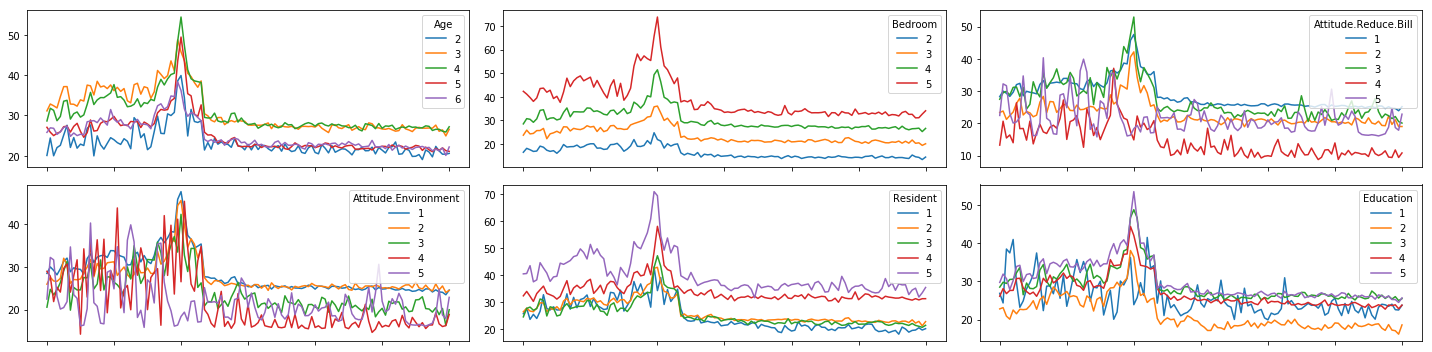

In [52]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 5))
for i in range(6):
    data.groupby(data.columns[i]).mean().iloc[:,5:-1].transpose().plot(ax=ax[i%2,i%3])
fig.tight_layout()
plt.show()

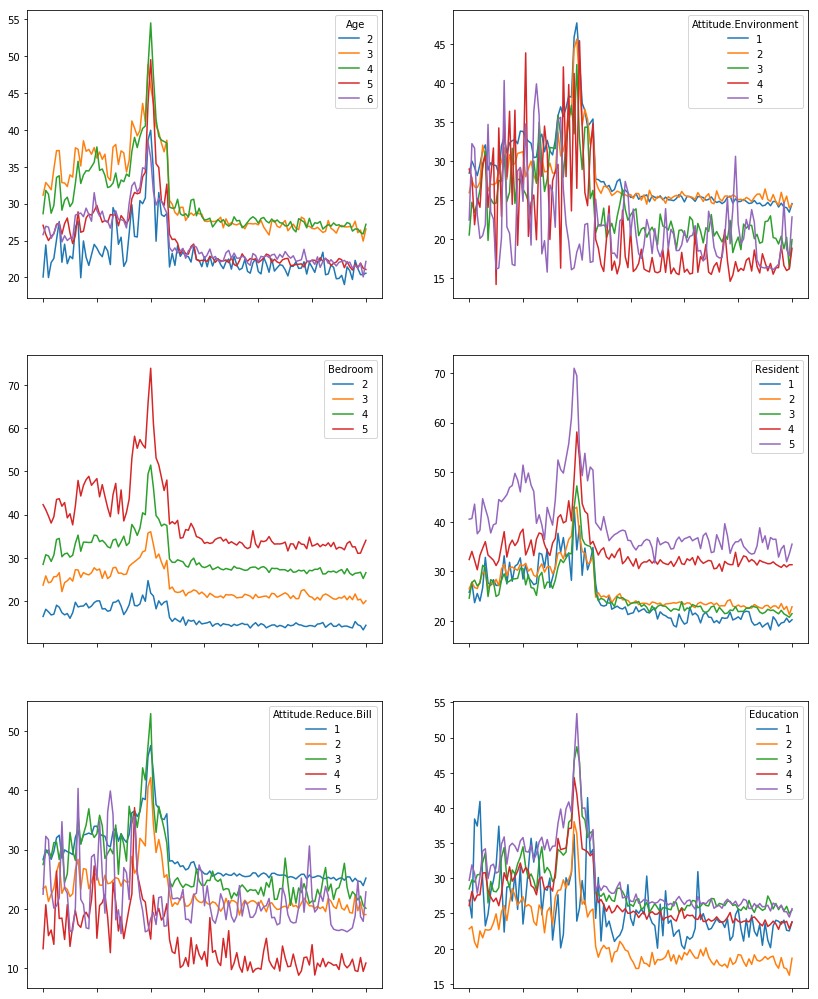

In [96]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))
for i in range(6):
    data.groupby(data.columns[i]).mean().iloc[:,5:-1].transpose().plot(ax=ax[i%3,i%2])

In [88]:
# 
# reduce dimentionality from 121D to 2D for visualization

from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()   
norm_X = scaler.fit_transform(X)

pca = PCA(n_components=2, random_state=2019)
pca = pca.fit(norm_X)  
pca_matrix = pca.transform(norm_X)   

lrcv.fit(pca_matrix,y)

# the accuracy 
y_pca_predict = lrcv.predict(pca_matrix)
sum(y_pca_predict==y)/len(y)

[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.0s finished


0.5496688741721855

In [49]:
# choose the best dimention to improve prediction accuracy

result = []

for i in range(1,15):
    pca = PCA(n_components=i, random_state=2019)
    pca = pca.fit(norm_X)  
    pca_matrix = pca.transform(norm_X)   
    lrcv.fit(pca_matrix,y)
    y_pca_predict = lrcv.predict(pca_matrix)
    result.append(sum(y_pca_predict==y)/len(y))

[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.1s finished


In [50]:
d = pd.DataFrame({'s1': [i for i in range(1,15)], 's2': result})

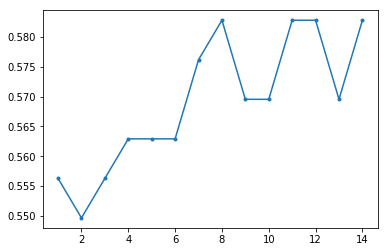

In [51]:
# reduce the dimension to 8 -- the accuracy reach to 0.6
plt.plot(d.s1,d.s2, '.-')

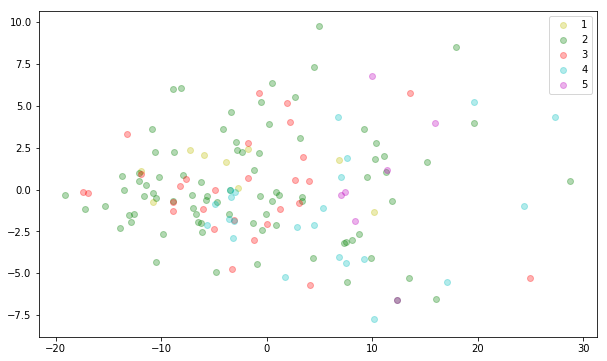

In [52]:
colors = ['y', 'g', 'r', 'c', 'm']

plt.rc('figure',figsize=(10,6))
for num in range(1,6) :
    temp = pca_matrix[data.Resident == num,:]
    plt.scatter(temp[:,0],temp[:,1],c=colors[num-1],label=num,alpha=0.3)
plt.legend(loc='best')


# we can not find a pattern to seperate different resident numbers as different groups